In [26]:
import os

if os.path.exists('requirements.txt'):
    !pip3 install -r requirements.txt
else:
    !pip3 install pandas seaborn scikit-learn
    !pip3 freeze > requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('./data/train.csv')
df.sample(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9812,2012-10-13 05:00:00,4,0,0,1,12.30,14.395,61,12.9980,0,11,11
10839,2012-12-18 01:00:00,4,0,1,2,18.04,21.970,94,8.9981,0,15,15
1823,2011-05-02 21:00:00,2,0,1,2,24.60,29.545,73,7.0015,54,178,232
5549,2012-01-06 08:00:00,1,0,1,1,9.84,12.120,70,8.9981,11,436,447
2468,2011-06-10 18:00:00,2,0,1,1,32.80,38.635,59,15.0013,96,367,463
1270,2011-03-17 18:00:00,1,0,1,2,18.86,22.725,59,11.0014,50,260,310
995,2011-03-05 22:00:00,1,0,0,2,17.22,21.210,77,19.9995,16,47,63
9103,2012-09-02 16:00:00,3,0,0,1,30.34,34.850,70,0.0000,222,252,474
9952,2012-10-19 01:00:00,4,0,1,3,22.14,25.760,88,0.0000,4,12,16
2560,2011-06-14 14:00:00,2,0,1,2,26.24,31.060,47,12.9980,41,118,159


In [29]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


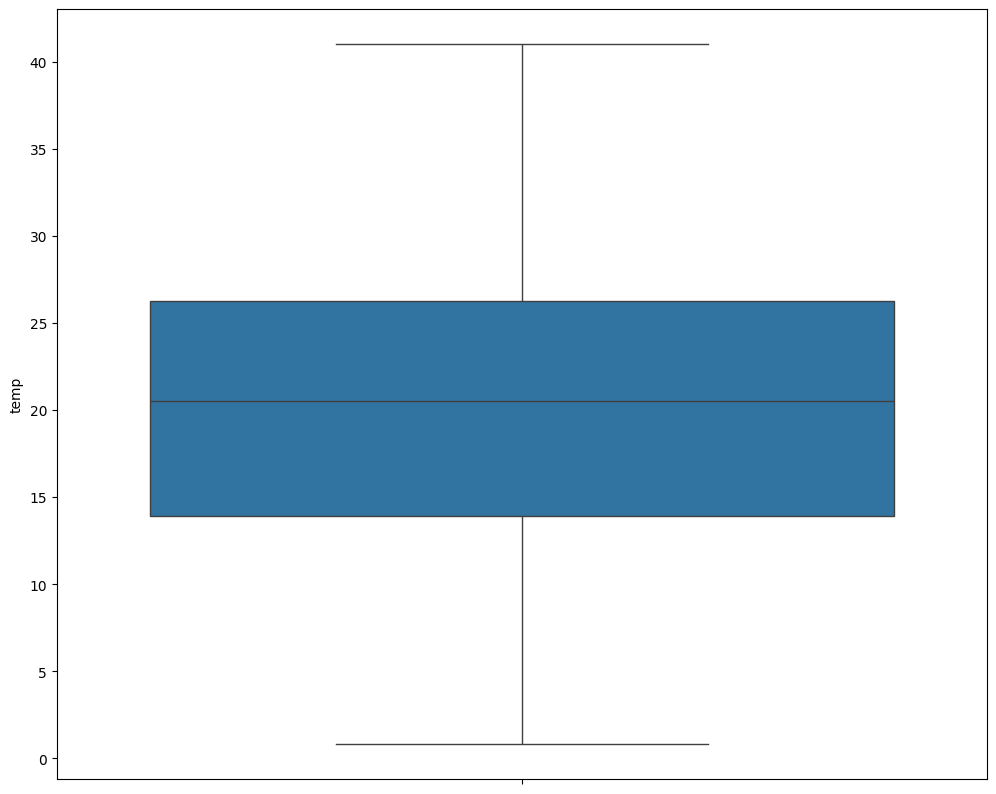

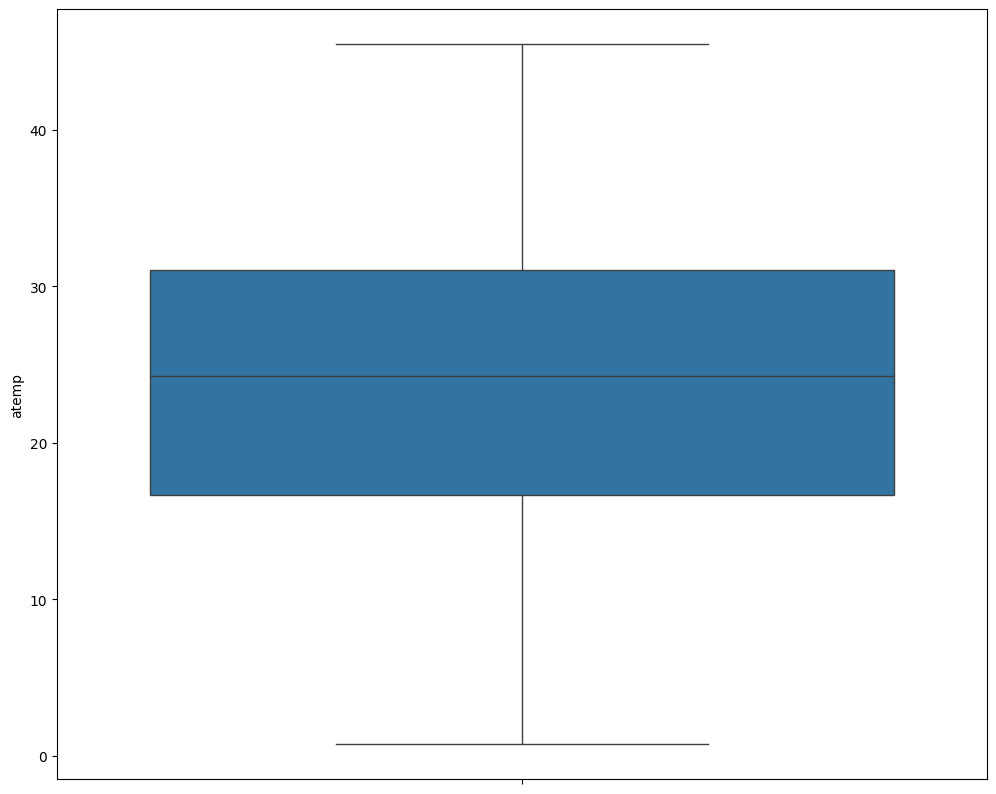

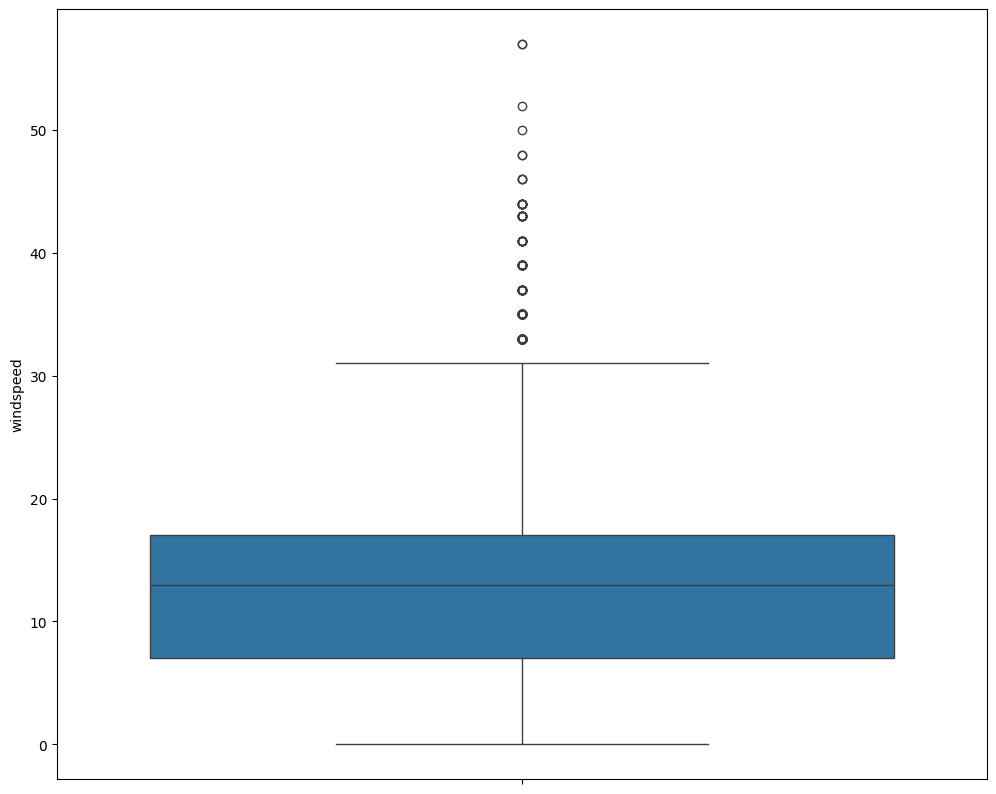

In [30]:
def plot_boxplot(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 10))
        sns.boxplot(df[col])
        plt.show()

decimal_cols = list(df.select_dtypes(include=['float64']).columns)

plot_boxplot(df, decimal_cols)

In [31]:
def remove_outliers(df: pd.DataFrame, col: str) -> pd.DataFrame:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df.copy(deep=True)[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [44]:
def format_dates(df: pd.DataFrame, col: str) -> pd.DataFrame:
    df[col] = pd.to_datetime(df[col])
    # df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df['day'] = df[col].dt.day
    df['hour'] = df[col].dt.hour
    df = df.drop(columns=[col])
    return df.copy(deep=True)

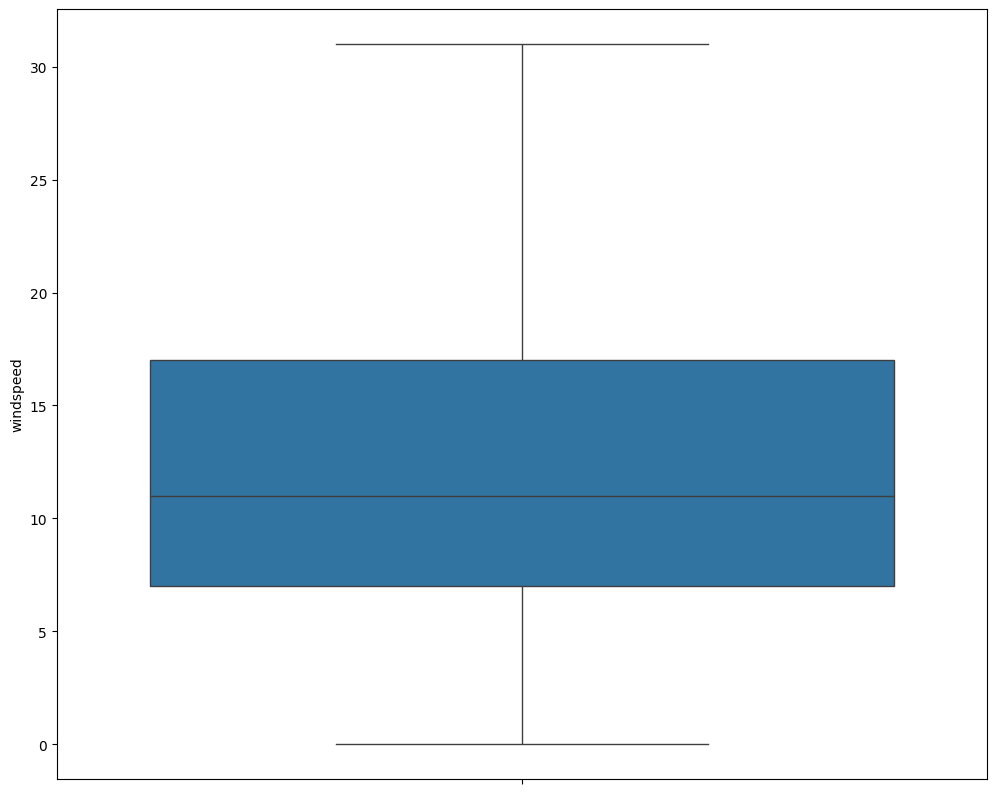

In [45]:
no_outliers_df = remove_outliers(df, 'windspeed')
plot_boxplot(no_outliers_df, ['windspeed'])

In [46]:
no_outliers_df.sample(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1718,2011-04-17 12:00:00,2,0,0,1,18.86,22.725,38,26.0027,167,187,354
6901,2012-04-05 21:00:00,2,0,1,1,17.22,21.210,47,12.9980,25,209,234
9687,2012-10-08 00:00:00,4,1,0,1,15.58,19.695,76,19.0012,7,44,51
2927,2011-07-10 21:00:00,3,0,0,1,30.34,34.090,62,16.9979,65,162,227
5328,2011-12-16 02:00:00,4,0,1,1,19.68,23.485,77,7.0015,0,23,23
9394,2012-09-14 19:00:00,3,0,1,1,27.88,31.820,57,11.0014,83,496,579
3014,2011-07-14 12:00:00,3,0,1,1,30.34,32.575,35,16.9979,51,172,223
7519,2012-05-12 16:00:00,2,0,0,2,28.70,31.820,21,12.9980,254,337,591
3618,2011-09-01 16:00:00,3,0,1,1,30.34,33.335,51,12.9980,55,253,308
1505,2011-04-08 14:00:00,2,0,1,3,13.94,15.910,87,15.0013,2,13,15


In [47]:
no_outliers_df = format_dates(no_outliers_df, 'datetime')
no_outliers_df.sample(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
5175,4,0,1,1,13.94,17.425,66,7.0015,10,352,362,12,9,17
548,1,0,0,1,10.66,12.880,70,12.9980,2,37,39,2,6,0
7650,2,0,1,1,18.86,22.725,72,6.0032,6,8,14,5,18,3
10715,4,0,1,2,12.30,14.395,52,16.9979,16,186,202,12,12,21
5369,4,0,0,3,9.84,10.605,65,22.0028,11,95,106,12,17,19
9010,3,0,1,2,30.34,12.120,55,26.0027,88,403,491,8,17,19
3119,3,0,1,1,30.34,34.850,66,12.9980,48,154,202,7,18,21
7268,2,0,1,1,22.14,25.760,90,8.9981,2,31,33,5,2,5
8254,3,0,1,1,31.16,34.850,55,0.0000,27,316,343,7,5,7
7248,2,0,1,2,22.14,25.760,88,12.9980,18,331,349,5,1,9


<Axes: xlabel='temp', ylabel='count'>

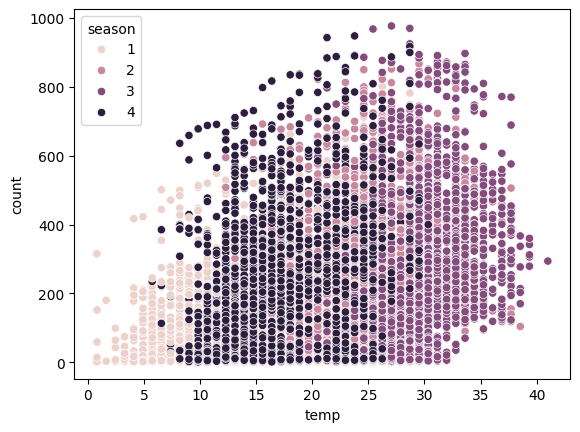

In [48]:
sns.scatterplot(data=no_outliers_df, x='temp', y='count', hue='season')

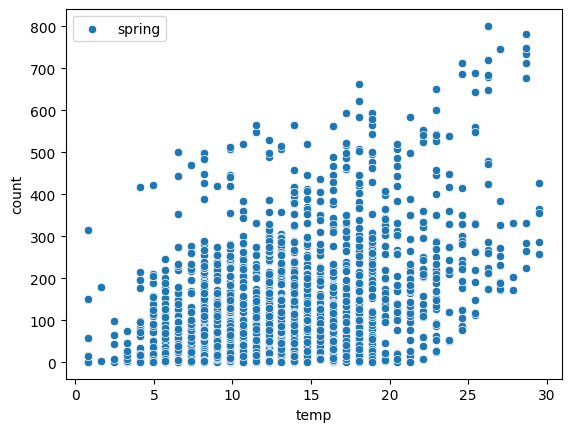

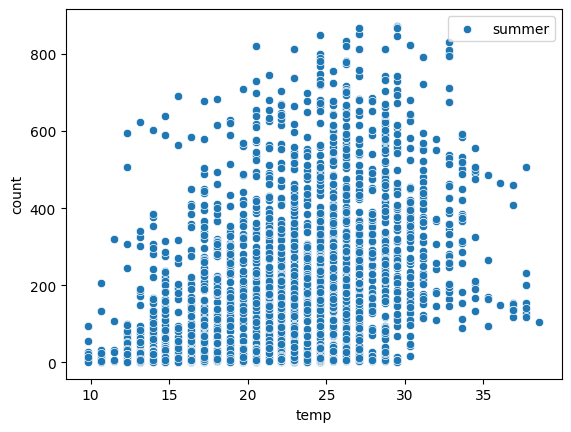

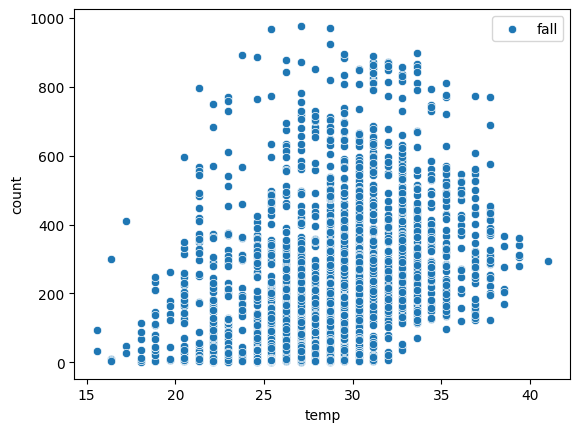

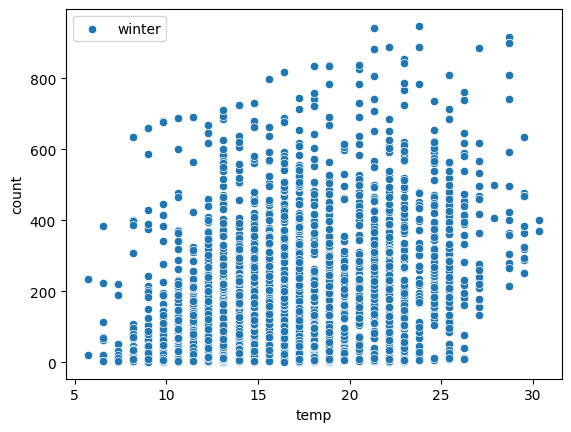

In [60]:
season_vals = no_outliers_df['season'].unique()
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}


for season in season_vals:
    sns.scatterplot(data=no_outliers_df[no_outliers_df['season'] == season], x='temp', y='count', label=season_dict[season])
    plt.show()

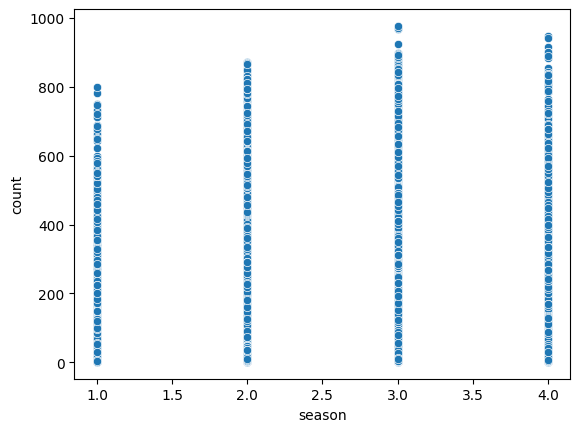

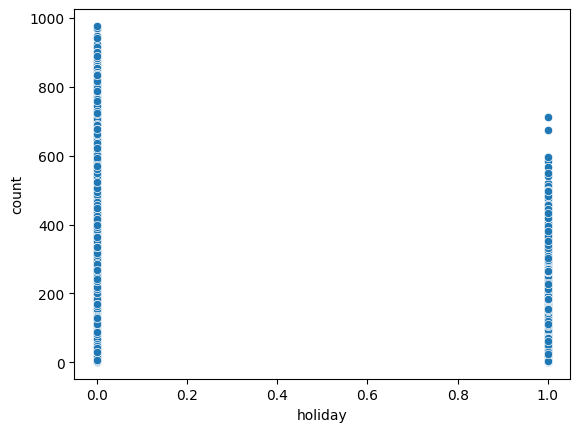

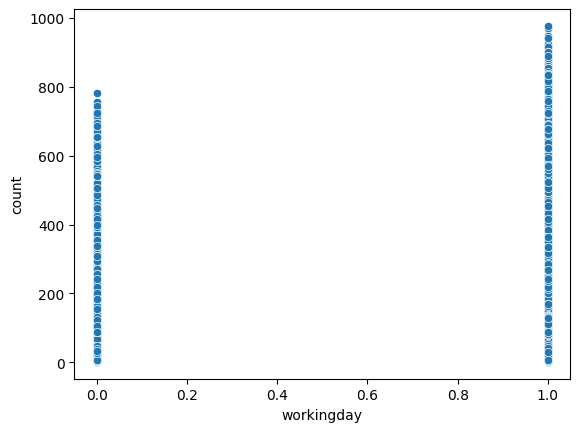

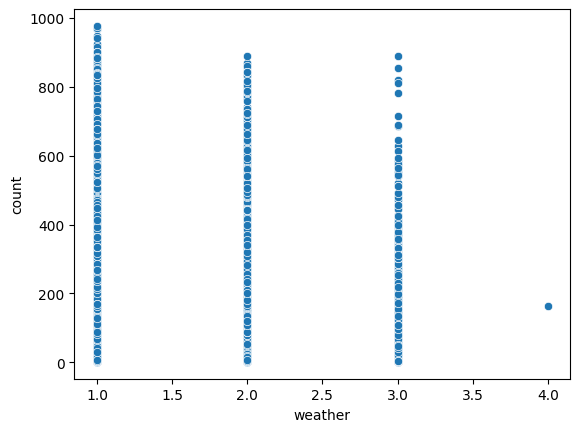

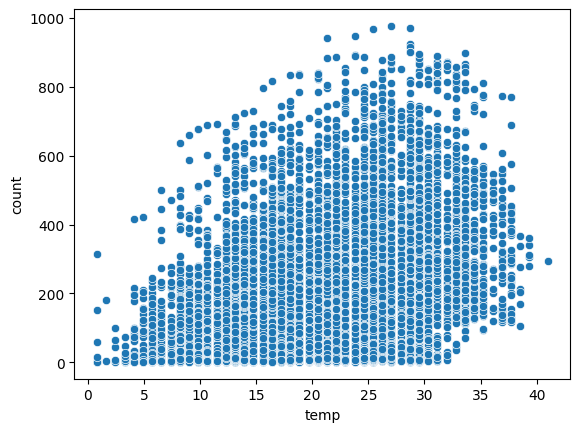

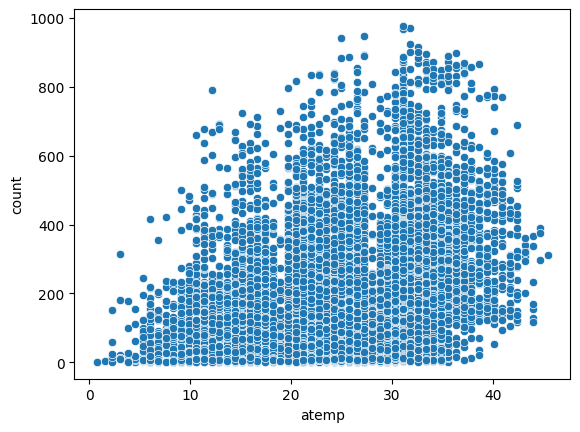

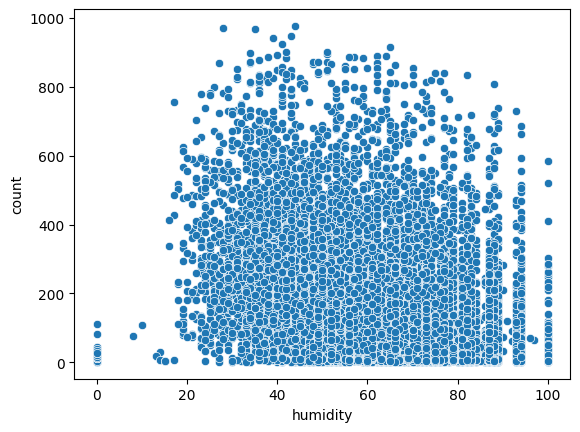

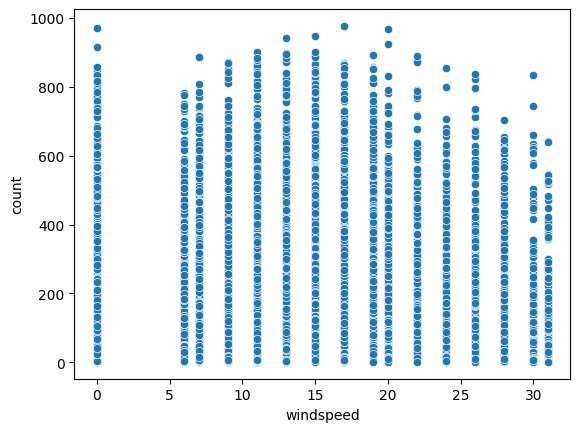

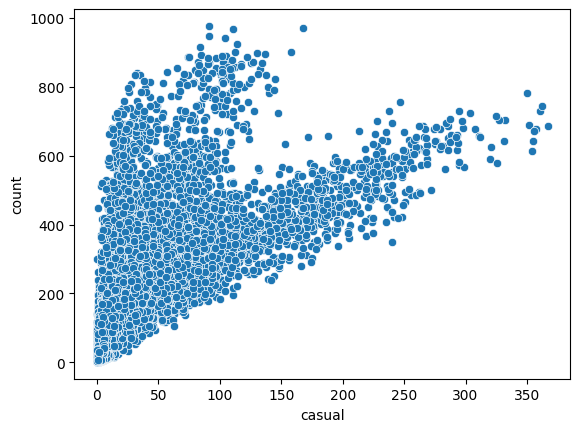

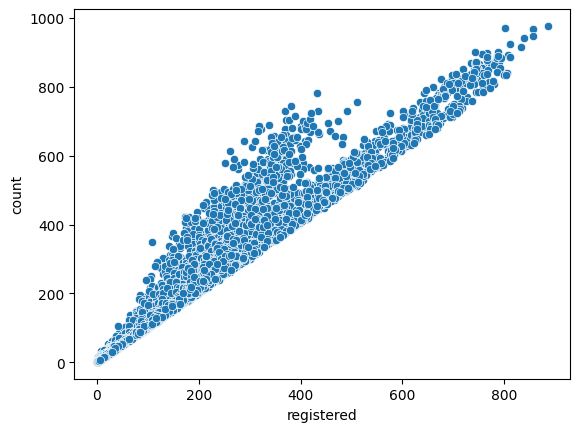

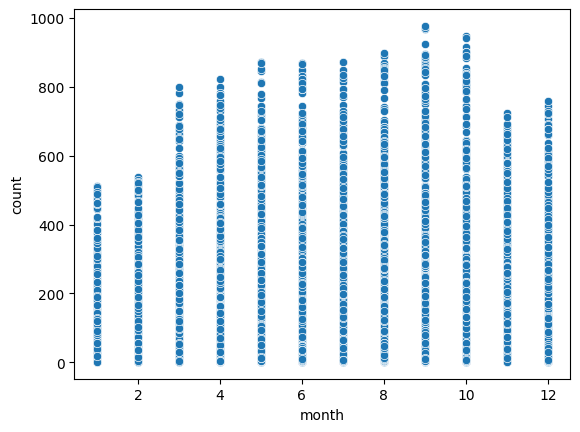

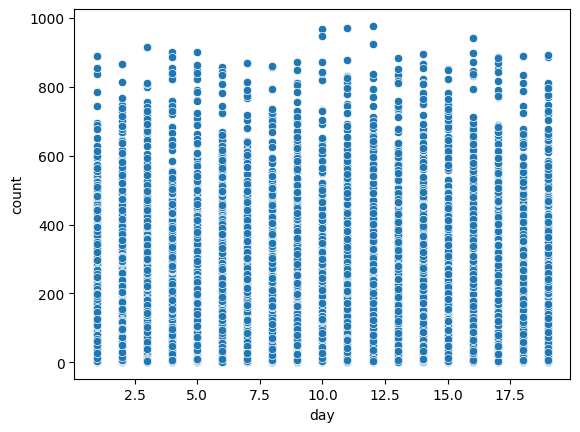

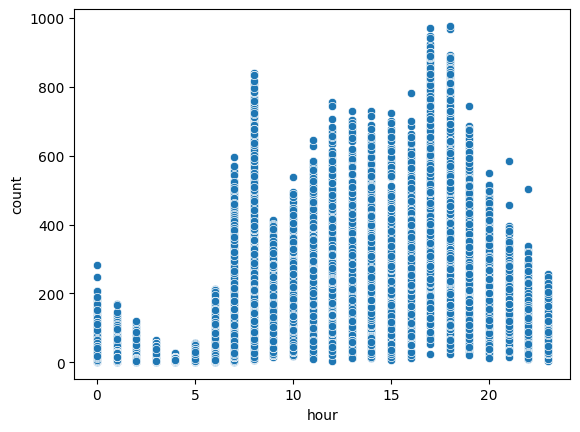

In [49]:
for col in no_outliers_df.columns:
    if col != 'count':
        sns.scatterplot(data=no_outliers_df, x=col, y='count')
        plt.show()

<Axes: >

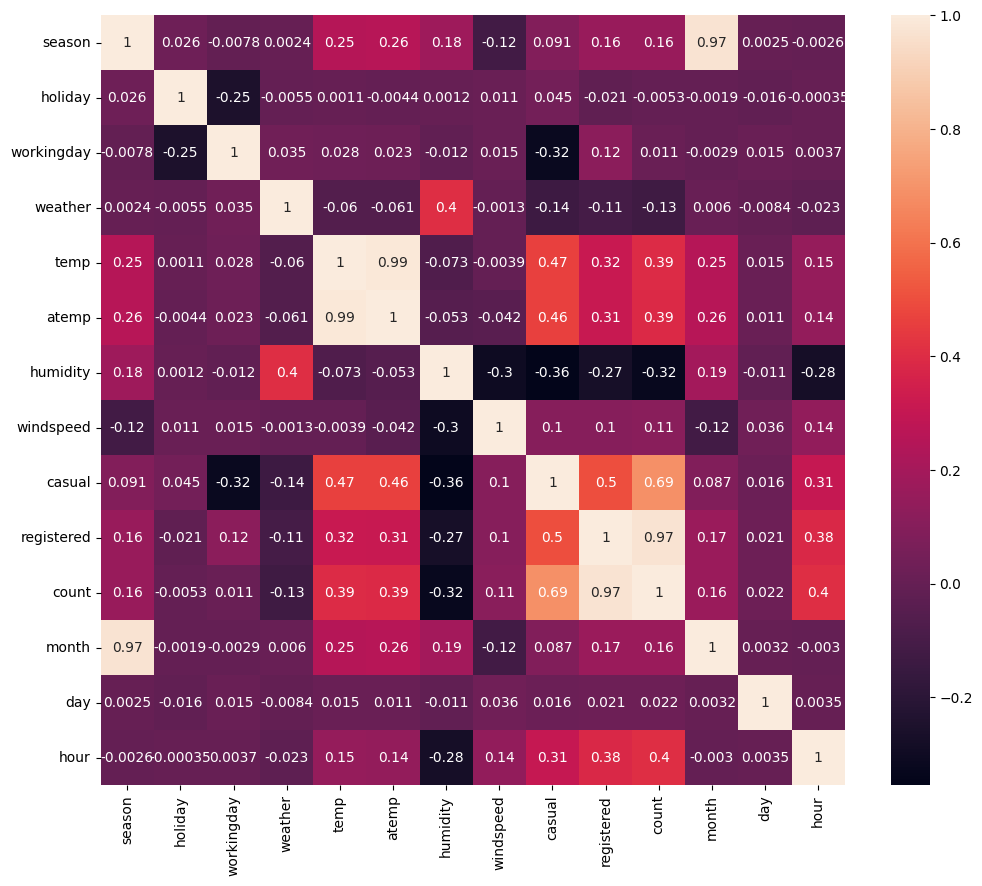

In [62]:
plt.figure(figsize=(12, 10))
sns.heatmap(no_outliers_df.corr(), annot=True)

In [50]:
if not os.path.exists('./outputs'):
    os.makedirs('./outputs')

no_outliers_df.to_csv('./outputs/train_processed.csv', index=False)